<a href="https://colab.research.google.com/github/robertccruz13-ship-it/sds-510-robert-cruz/blob/main/module_7_essentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [26]:
from google.colab import files
uploaded = files.upload()

Saving hpi_master.csv to hpi_master.csv


In [27]:
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.87,100.87
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.32,100.90
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.73,100.96
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.32,101.31


In [29]:
print(df.shape)
print(df.columns[:10])
print(df.dtypes)

(132363, 10)
Index(['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name',
       'place_id', 'yr', 'period', 'index_nsa', 'index_sa'],
      dtype='object')
hpi_type       object
hpi_flavor     object
frequency      object
level          object
place_name     object
place_id       object
yr              int64
period          int64
index_nsa     float64
index_sa      float64
dtype: object


In [31]:
df['date'] = pd.to_datetime(df['yr'].astype(str) + '-' + df['period'].astype(str), format='%Y-%m')

# Using 'place_name' as the grouping key (equivalent to 'state') and 'index_nsa' as the index for calculations
df['index'] = df['index_nsa']

df = df.sort_values(['place_name','date'])

df['index_lag12'] = df.groupby('place_name')['index'].shift(12)
# Fixed SyntaxError: unterminated string literal and clarified calculation
df['pct_change_12m'] = 100 * (df['index'] / df['index_lag12'] - 1)

latest = df.dropna(subset=['pct_change_12m']).sort_values('date').groupby('place_name').tail(1)

top10 = latest.sort_values('pct_change_12m', ascending=False).head(10)
print("Top 10 regions - most recent annual house-price growth:")
# Changed 'state' to 'place_name' for printing
print(top10[['place_name', 'date', 'pct_change_12m']])

Top 10 regions - most recent annual house-price growth:
                  place_name       date  pct_change_12m
4169           United States 2025-09-01       37.875274
31591         Hinesville, GA 2025-02-01       32.829145
65853           Syracuse, NY 2025-03-01       31.429586
34620          Johnstown, PA 2025-03-01       31.344307
33226             Ithaca, NY 2025-03-01       31.045620
67413  Trenton-Princeton, NJ 2025-03-01       29.510687
57195           Rockford, IL 2025-03-01       29.504041
36935             Kokomo, IN 2025-03-01       29.363098
24616         Farmington, NM 2025-03-01       29.228782
34361     Jefferson City, MO 2025-03-01       28.651149


/tmp/ipython-input-1781383526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='pct_change_12m', y='place_name', palette='viridis')


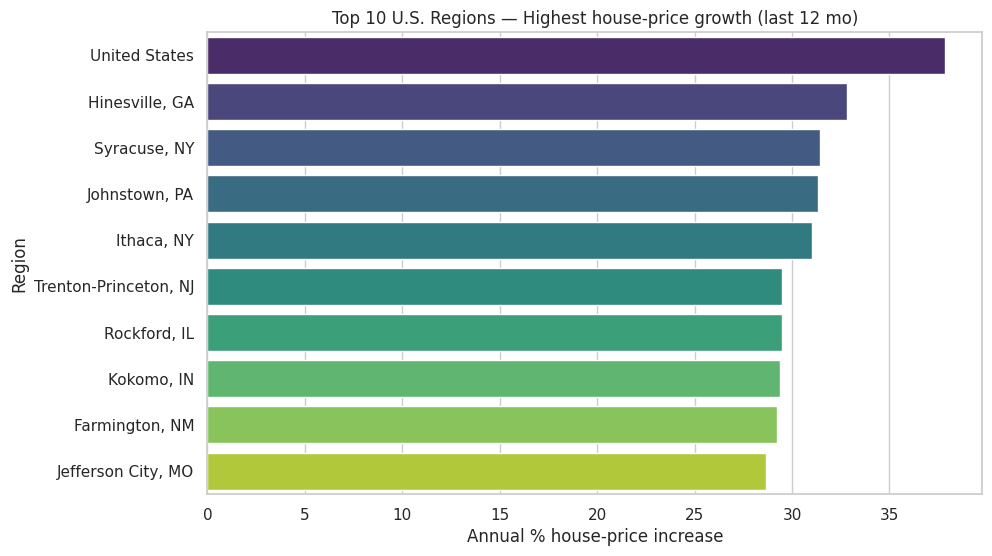

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='pct_change_12m', y='place_name', palette='viridis')
plt.xlabel("Annual % house-price increase")
plt.ylabel("Region")
plt.title("Top 10 U.S. Regions — Highest house-price growth (last 12 mo)")
plt.show()

Which states show the highest recent growth? Hinesville, GA
Are there any geographic patterns? NJ
Which factors are correlated with high price increases? After 2020, prices skyrocketed.